In [3]:
import keras

Using TensorFlow backend.


In [2]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# Connect to your google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# List Everything in your Google Drive. Note that DataCatOrDog.zip shall be uploaded to your Google Drive first
!ls /content/drive/My\ Drive

'5) What is the role of moral leadership in business.gdoc'
'Argumentative essay final draft.gdoc'
'BAAI Project Proposal.docx'
'BAAI Project Proposal.gdoc'
'Colab Notebooks'
'Deliverable 5'
'Deliverable #5 .gdoc'
'Electronic ticket receipt, June 10 for ANTENEH MARIAMAWIT  G.pdf'
 glove.6B.50d.txt
'HTAR09961 (181).JPG'
'HTAR09961 (184).JPG'
'HTAR09961 (2).MOV'
 i-765-3.pdf
'images(2).pdf'
 IMG_0252.MOV
 International-Student-Aid-App-2015-2016.pdf
'JO Resume .docx'
'pdfDoc OPT Request (1).pdf'
'personal essay second draft.docx.gdoc'
'personal essay third and final draft.docx'
'SamrawitA-Resume  .pages'
'Teenage Sex.docx'
 test_emoji.csv
'to be bought.gdoc'
 train_emoji.csv
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram.drawio'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Womens Clothing E-Commerce Reviews.csv'
'writting argumentative essay second draft.gdoc'


In [6]:
# Read Data
import os
os.chdir('/content/drive/My Drive')
         
import pandas as pd
dataset = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', na_filter=False)

X = dataset.iloc[:,4].values
y = dataset.iloc[:,5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

print(X_train)

["I didn't notice what some of the other reviews have said. i think it's very flattering, makes my waist look tiny and the flouncy skirt is a lot of fun. it is low cut in the bust, but not crazy. i'm a modest person and i'm comfortable with it. what i like best however it the cut of the top. it is wide enough at the arms to cover any armpit bulge! the fabric is very light and soft and the colors are vibrant and fun. it does run a tad large. i can go between a 2 and 4 in most retailer dresses and got"
 "I absolutely love this shirt! i saw it in the retailer store and immediately knew i had to have it. all they had in stock was a size 2 and a size 8. i'm usually a 4-6 in button-up shirts, but i tried the 2 anyway and found it to be quite generously sized. i have a 32dd bust, so button-up shirts rarely fit me properly. this one was big enough to be comfortable worn out or tucked in, and was loose-fitting without being sloppy. when i discovered that it came in petite sizes, i asked the so 

In [7]:
y_train

array([5, 5, 3, ..., 3, 3, 5])

In [8]:
# Read 50 feature dimension glove file
import numpy as np
glove_file = 'glove.6B.50d.txt'   

with open(glove_file, 'r', encoding="utf8") as f:
    word_to_vec_map = {} # Create a Python dictionary to contain each word
    for line in f:
        line = line.strip().split()
        curr_word = line[0]
        word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    
print(word_to_vec_map["happy"]) # show the embedding vector of the word "happy"
print(word_to_vec_map["happy"].shape[0])  # define dimensionality of your GloVe word vectors (= 50)
print('The dictionary contains', len(word_to_vec_map),  'words.')

[ 0.092086  0.2571   -0.58693  -0.37029   1.0828   -0.55466  -0.78142
  0.58696  -0.58714   0.46318  -0.11267   0.2606   -0.26928  -0.072466
  1.247     0.30571   0.56731   0.30509  -0.050312 -0.64443  -0.54513
  0.86429   0.20914   0.56334   1.1228   -1.0516   -0.78105   0.29656
  0.7261   -0.61392   2.4225    1.0142   -0.17753   0.4147   -0.12966
 -0.47064   0.3807    0.16309  -0.323    -0.77899  -0.42473  -0.30826
 -0.42242   0.055069  0.38267   0.037415 -0.4302   -0.39442   0.10511
  0.87286 ]
50
The dictionary contains 400000 words.


In [9]:
# Split a whole sentence into words
a_piece_of_sentence = X_train[0]
print(a_piece_of_sentence)

# will be treated as different words. For this we can use gensim's text preprocssing functionality:
# https://radimrehurek.com/gensim/
!pip install --upgrade gensim
import gensim
single_sentence_as_list_of_words = gensim.utils.simple_preprocess( a_piece_of_sentence ) 
print(single_sentence_as_list_of_words)

I didn't notice what some of the other reviews have said. i think it's very flattering, makes my waist look tiny and the flouncy skirt is a lot of fun. it is low cut in the bust, but not crazy. i'm a modest person and i'm comfortable with it. what i like best however it the cut of the top. it is wide enough at the arms to cover any armpit bulge! the fabric is very light and soft and the colors are vibrant and fun. it does run a tad large. i can go between a 2 and 4 in most retailer dresses and got
     |████████████████████████████████| 24.2MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
['didn', 'notice', 'what', 'some', 'of', 'the', 'other', 'reviews', 'have', 'said', 'think', 'it', 'very', 'flattering', 'makes', 'my', 'waist', 'look', 'tiny', 'and', 'the', 'flouncy', 'skirt', 'is', 'lot', 'of', 'fun', 'it', 'is', 'low', 'cut', 'in', 'the', 'bust', 'but', 'not', 'crazy', 'modest', 'person', 'and', 'com

In [10]:
# Repeat the above process for all sentences in the training set
dataTrain_as_lists_of_words = []
for i in range(len(X_train)):
    a_piece_of_sentence = X_train[i]    
    single_sentence_as_list_of_words = gensim.utils.simple_preprocess( a_piece_of_sentence ) 
    dataTrain_as_lists_of_words.append(single_sentence_as_list_of_words)
print(dataTrain_as_lists_of_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# Repeat the above process for all sentences in the set set  
dataTest_as_lists_of_words = []
for i in range(len(X_test)):
    a_piece_of_sentence = X_test[i]    
    single_sentence_as_list_of_words = gensim.utils.simple_preprocess( a_piece_of_sentence ) 
    dataTest_as_lists_of_words.append(single_sentence_as_list_of_words) 
print(dataTest_as_lists_of_words)

[['just', 'received', 'and', 'sorry', 'to', 'return', 'am', 'wear', 'size', 'ordered', 'the', 'it', 'way', 'really', 'big', 'and', 'to', 'wide'], ['this', 'is', 'tts', 'basic', 'tee', 'with', 'the', 'added', 'flare', 'of', 'the', 'ruffled', 'back', 'peplum', 'and', 'the', 'elegance', 'of', 'the', 'beaded', 'front', 'neckline', 'the', 'beading', 'is', 'lovely', 'and', 'mine', 'was', 'intact', 'bought', 'my', 'normal', 'small', 'based', 'on', 'reviews', 'and', 'the', 'fit', 'was', 'perfect', 'the', 'beige', 'color', 'is', 'classic', 'neutral', 'and', 'can', 'be', 'worn', 'year', 'round', 'by', 'just', 'adding', 'jacket', 'or', 'sweater', 'love', 'it'], ['am', 'very', 'happy', 'with', 'this', 'shirt', 'don', 'like', 'skin', 'tight', 'clothes', 'bought', 'this', 'top', 'bit', 'loose', 'but', 'it', 'does', 'not', 'look', 'like', 'am', 'wearing', 'sack', 'it', 'is', 'tunic', 'length', 'on', 'me', 'so', 'have', 'worn', 'it', 'with', 'jeans', 'and', 'boots', 'love', 'the', 'way', 'it', 'flows'

In [12]:
# Create Embedding Data from Words   
# Or Say: Convert Words to Numbers
SENTENCE_LENGTH = 100 # maximum number of words in a sentence 
EMBEDDED_VECTOR_DIM = 50 # Embedded Word Vector Dimension

# get a sentense as list of words 
list_of_words = dataTrain_as_lists_of_words[0]

# create a matrix sentense_word2vec
# we put each word in this sentence as 50 numbers in this matrix
sentense_word2vec = np.zeros((SENTENCE_LENGTH, EMBEDDED_VECTOR_DIM))

for word_nr in range( min(SENTENCE_LENGTH, len(list_of_words)) ):    
    # get the next word from the review
    word = list_of_words[word_nr]   
    try:
        # get the corresponding word vector from dictionary
        word_vec = word_to_vec_map[word]  
        # copy the word-vector to the matrix
        sentense_word2vec[word_nr,:] = word_vec
    except:
        # Skip the word that is not in the dictionary
        sentense_word2vec[word_nr,:] = np.zeros((EMBEDDED_VECTOR_DIM))

print(sentense_word2vec)

[[-0.077432 -0.17968   1.0954   ...  0.79036  -0.14109   0.63367 ]
 [ 0.21637  -0.16276  -0.21876  ...  0.64911   0.19922   0.45611 ]
 [ 0.45323   0.059811 -0.10577  ...  0.5324   -0.25103   0.62546 ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


In [13]:
# Repeat above process for all sentenses in the training dataset        
trainX = []        
for sentence_nr in range(len(dataTrain_as_lists_of_words)):
    # get a sentense as list of words 
    list_of_words = dataTrain_as_lists_of_words[sentence_nr]
      
    # create a matrix sentense_word2vec
    # we put each word in this sentence as 50 numbers in this matrix
    sentense_word2vec = np.zeros((SENTENCE_LENGTH, EMBEDDED_VECTOR_DIM))   
    for word_nr in range( min(SENTENCE_LENGTH, len(list_of_words)) ): 
        # get the next word from the review
        word = list_of_words[word_nr]
        try:
            # get the corresponding word vector from dictionary
            word_vec = word_to_vec_map[word]
            # copy the word-vector to the matrix
            sentense_word2vec[word_nr,:] = word_vec
        except:
            # Skip the word that is not in the dictionary
            sentense_word2vec[word_nr,:] = np.zeros((EMBEDDED_VECTOR_DIM))
       
    # Stack each result together    
    trainX.append(sentense_word2vec)
 
trainX = np.array(trainX)
print(trainX.shape) 
"""
(18788, 100, 50)
18788 pieces of sentences
100 words in a sentence 
50 numbers for a word
"""

trainY = np.array(y_train) 

(18788, 100, 50)


In [14]:
# Repeat above process for all sentenses in the test dataset        
testX = []        
for sentence_nr in range(len(dataTest_as_lists_of_words)):
    # get a sentense as list of words 
    list_of_words = dataTest_as_lists_of_words[sentence_nr]
      
    # create a matrix sentense_word2vec
    # we put each word in this sentence as 50 numbers in this matrix
    sentense_word2vec = np.zeros((SENTENCE_LENGTH, EMBEDDED_VECTOR_DIM))
    
    for word_nr in range( min(SENTENCE_LENGTH, len(list_of_words)) ):  
        # get the next word from the review
        word = list_of_words[word_nr] 
        try:
            # get the corresponding word vector from dictionary
            word_vec = word_to_vec_map[word]
            # copy the word-vector to the matrix
            sentense_word2vec[word_nr,:] = word_vec
        except:
            # Skip the word that is not in the dictionary
            sentense_word2vec[word_nr,:] = np.zeros((EMBEDDED_VECTOR_DIM))
       
    # Stack each result together    
    testX.append(sentense_word2vec)
 
testX = np.array(testX)
print(testX.shape) 
"""
(4698, 100, 50)
4698 pieces of sentences
100 words in a sentence 
50 numbers for a word
"""
testY = np.array(y_test)

(4698, 100, 50)


In [20]:
# # Building and training the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(SENTENCE_LENGTH, EMBEDDED_VECTOR_DIM)))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])    
model.summary()

history = model.fit(trainX,
          trainY,
          epochs=20,
          batch_size=32,
          verbose=1,
          validation_data=(testX, testY))

"""
accuracy 31%
increasing the layers may help in getting better result.
"""

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 60,501
Trainable params: 60,501
Non-trainable params: 0
_________________________________________________________________
Train on 18788 samples, validate on 4698 samples
Epoch 1/20
18788/18788 [==============================] - 93s 5ms/step - loss: 11.4550 - mean_absolute_error: 3.1983 - val_loss: 11.4138 - val_mean_absolute_error: 3.1869
Epoch 2/20
18788/18788 [==============================] - 91s 5ms/step - loss: 11.4550 - mean_absolute_error: 3.1983 - val_loss: 11.4138 - val_mean_absolute_error: 3.1869
Epoch 3/20
18788/18788 [==============================] - 94s 5ms/step - loss: 11.4550 - mean_absolute_error: 3.1983 - va

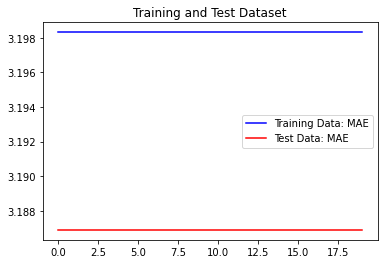

In [21]:
# Visualize the training history
# Let's plot our results again:
mae = history.history['mean_absolute_error']
mae_test = history.history['val_mean_absolute_error']
epochs = range(len(mae))

from matplotlib import pyplot as plt
plt.plot(epochs, mae, 'b-', label='Training Data: MAE')
plt.plot(epochs, mae_test, 'r-', label='Test Data: MAE')
plt.title('Training and Test Dataset')
plt.legend()
plt.show()

In [29]:
import math
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(trainX, trainY,))
print('The RMSE error on the test dataset', rmse_test)


ValueError: ignored